# Homework: IoT Data Simulation

In [96]:
import pandas as pd
import numpy as np
from datetime import timedelta
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
# Load datasets
df1 = pd.read_csv('gecco_2018.csv')
df2 = pd.read_csv('gecco_2019.csv')

In [98]:
# Check for missing or null values in each column
df1.isnull().sum()

Unnamed: 0                 0
Timestamp                  0
Temperature (°C)        1044
ClO2 MS1 (mg/L)         1045
pH                      1044
Redox (mV)              1044
Conductivity (µS/cm)    1044
Turbidity (NTU)         1044
ClO2 MS2 (mg/L)         1044
Flow Rate 1 (m3/h)      1044
Flow Rate 2 (m3/h)      1044
Event                      0
dtype: int64

In [99]:
# Drop the Unnamed: 0 column 
df1 = df1.drop(columns=['Unnamed: 0'])

In [100]:
# Check total numbers of rows
print(df1.shape[0])

139566


In [101]:
# Drop rows with missing values
df1.dropna(inplace=True)  

In [102]:
print(df1.shape[0])

138521


In [103]:
df1.isnull().sum()

Timestamp               0
Temperature (°C)        0
ClO2 MS1 (mg/L)         0
pH                      0
Redox (mV)              0
Conductivity (µS/cm)    0
Turbidity (NTU)         0
ClO2 MS2 (mg/L)         0
Flow Rate 1 (m3/h)      0
Flow Rate 2 (m3/h)      0
Event                   0
dtype: int64

In [104]:
# Handle duplicates
df1.drop_duplicates(inplace=True)

In [105]:
df1.duplicated().sum()

np.int64(0)

In [106]:
# Remove outliers
df1 = df1[(np.abs(stats.zscore(df1.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

In [107]:
print(df1.shape[0])

133417


In [108]:
# Check for missing or null values in each column
df2.isnull().sum()

Unnamed: 0                     0
Timestamp                      0
Temperature (°C)             214
pH                           208
Conductivity (S/m)           204
Turbidity (FNU)              205
Spectral Absorption (1/m)    200
Pulse Frequency (Hz)         211
Event                          0
dtype: int64

In [109]:
df2.duplicated().sum()

np.int64(0)

In [110]:
# Drop the Unnamed: 0 column 
df2 = df2.drop(columns=['Unnamed: 0'])

In [111]:
# # Drop rows with missing values
df2.dropna(inplace=True)  

In [112]:
# Remove outliers
df2 = df2[(np.abs(stats.zscore(df2.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

In [113]:
df2.isnull().sum()

Timestamp                    0
Temperature (°C)             0
pH                           0
Conductivity (S/m)           0
Turbidity (FNU)              0
Spectral Absorption (1/m)    0
Pulse Frequency (Hz)         0
Event                        0
dtype: int64

In [114]:
# Check total numbers of columns
print(df2.shape[0])

131043


In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133417 entries, 0 to 139565
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Timestamp             133417 non-null  object 
 1   Temperature (°C)      133417 non-null  float64
 2   ClO2 MS1 (mg/L)       133417 non-null  float64
 3   pH                    133417 non-null  float64
 4   Redox (mV)            133417 non-null  float64
 5   Conductivity (µS/cm)  133417 non-null  float64
 6   Turbidity (NTU)       133417 non-null  float64
 7   ClO2 MS2 (mg/L)       133417 non-null  float64
 8   Flow Rate 1 (m3/h)    133417 non-null  float64
 9   Flow Rate 2 (m3/h)    133417 non-null  float64
 10  Event                 133417 non-null  bool   
dtypes: bool(1), float64(9), object(1)
memory usage: 11.3+ MB


In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131043 entries, 0 to 132479
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Timestamp                  131043 non-null  object 
 1   Temperature (°C)           131043 non-null  float64
 2   pH                         131043 non-null  float64
 3   Conductivity (S/m)         131043 non-null  float64
 4   Turbidity (FNU)            131043 non-null  float64
 5   Spectral Absorption (1/m)  131043 non-null  float64
 6   Pulse Frequency (Hz)       131043 non-null  float64
 7   Event                      131043 non-null  bool   
dtypes: bool(1), float64(6), object(1)
memory usage: 8.1+ MB


In [117]:
df1.tail()

,Timestamp,Temperature (°C),ClO2 MS1 (mg/L),pH,Redox (mV),Conductivity (µS/cm),Turbidity (NTU),ClO2 MS2 (mg/L),Flow Rate 1 (m3/h),Flow Rate 2 (m3/h),Event
139561,2016-11-08 08:50:00,10.1,0.16,8.41,762.0,189.0,0.023,0.105,1799.0,924.0,False
139562,2016-11-08 08:51:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1835.0,927.0,False
139563,2016-11-08 08:52:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1807.0,924.0,False
139564,2016-11-08 08:53:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1799.0,930.0,False
139565,2016-11-08 08:54:00,10.1,0.17,8.41,762.0,189.0,0.022,0.106,1817.0,925.0,False


In [118]:
df2.tail()

,Timestamp,Temperature (°C),pH,Conductivity (S/m),Turbidity (FNU),Spectral Absorption (1/m),Pulse Frequency (Hz),Event
132475,2017-09-30 23:55:00,10.3,8.56593,0.020724,0.126518,4.53577,56.4686,False
132476,2017-09-30 23:56:00,10.3,8.56593,0.020727,0.126575,4.53008,56.3567,False
132477,2017-09-30 23:57:00,10.3,8.56593,0.020723,0.126512,4.53512,55.0477,False
132478,2017-09-30 23:58:00,10.3,8.56228,0.020720,0.126477,4.54084,55.4052,False
132479,2017-09-30 23:59:00,10.3,8.56410,0.020723,0.126566,4.53445,54.9886,False


In [119]:
# Standardize Timestamp column: Convert to datetime
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])

In [120]:
# Harmonize units and rename columns
df2['Conductivity (µS/cm)'] = df2['Conductivity (S/m)'] * 1e4
df2.drop(columns=['Conductivity (S/m)'], inplace=True)

In [121]:
# Unify column names
df2.rename(columns={
    'Turbidity (FNU)': 'Turbidity (NTU)',
    # 'Spectral Absorption (1/m)': 'Spectral Absorption',
    # 'Pulse Frequency (Hz)': 'Pulse Frequency'
}, inplace=True)


In [122]:
df1.tail()

,Timestamp,Temperature (°C),ClO2 MS1 (mg/L),pH,Redox (mV),Conductivity (µS/cm),Turbidity (NTU),ClO2 MS2 (mg/L),Flow Rate 1 (m3/h),Flow Rate 2 (m3/h),Event
139561,2016-11-08 08:50:00,10.1,0.16,8.41,762.0,189.0,0.023,0.105,1799.0,924.0,False
139562,2016-11-08 08:51:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1835.0,927.0,False
139563,2016-11-08 08:52:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1807.0,924.0,False
139564,2016-11-08 08:53:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1799.0,930.0,False
139565,2016-11-08 08:54:00,10.1,0.17,8.41,762.0,189.0,0.022,0.106,1817.0,925.0,False


In [123]:
# Concatenation: Append rows from both datasets
df1['Source'] = 'GECCO 2018'
df2['Source'] = 'GECCO 2019'

df = pd.concat([df1, df2], axis=0, ignore_index=True)

In [124]:
df.head()

,Timestamp,Temperature (°C),ClO2 MS1 (mg/L),pH,Redox (mV),Conductivity (µS/cm),Turbidity (NTU),ClO2 MS2 (mg/L),Flow Rate 1 (m3/h),Flow Rate 2 (m3/h),Event,Source,Spectral Absorption (1/m),Pulse Frequency (Hz)
0,2016-08-03 11:49:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1677.0,695.0,False,GECCO 2018,NaN,NaN
1,2016-08-03 11:50:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1561.0,696.0,False,GECCO 2018,NaN,NaN
2,2016-08-03 11:51:00,6.5,0.17,8.35,749.0,211.0,0.011,0.117,1581.0,696.0,False,GECCO 2018,NaN,NaN
3,2016-08-03 11:52:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1579.0,693.0,False,GECCO 2018,NaN,NaN
4,2016-08-03 11:53:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1567.0,689.0,False,GECCO 2018,NaN,NaN


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264460 entries, 0 to 264459
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Timestamp                  264460 non-null  datetime64[ns]
 1   Temperature (°C)           264460 non-null  float64       
 2   ClO2 MS1 (mg/L)            133417 non-null  float64       
 3   pH                         264460 non-null  float64       
 4   Redox (mV)                 133417 non-null  float64       
 5   Conductivity (µS/cm)       264460 non-null  float64       
 6   Turbidity (NTU)            264460 non-null  float64       
 7   ClO2 MS2 (mg/L)            133417 non-null  float64       
 8   Flow Rate 1 (m3/h)         133417 non-null  float64       
 9   Flow Rate 2 (m3/h)         133417 non-null  float64       
 10  Event                      264460 non-null  bool          
 11  Source                     264460 non-null  object  

In [126]:
df.head()

,Timestamp,Temperature (°C),ClO2 MS1 (mg/L),pH,Redox (mV),Conductivity (µS/cm),Turbidity (NTU),ClO2 MS2 (mg/L),Flow Rate 1 (m3/h),Flow Rate 2 (m3/h),Event,Source,Spectral Absorption (1/m),Pulse Frequency (Hz)
0,2016-08-03 11:49:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1677.0,695.0,False,GECCO 2018,NaN,NaN
1,2016-08-03 11:50:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1561.0,696.0,False,GECCO 2018,NaN,NaN
2,2016-08-03 11:51:00,6.5,0.17,8.35,749.0,211.0,0.011,0.117,1581.0,696.0,False,GECCO 2018,NaN,NaN
3,2016-08-03 11:52:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1579.0,693.0,False,GECCO 2018,NaN,NaN
4,2016-08-03 11:53:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1567.0,689.0,False,GECCO 2018,NaN,NaN


In [127]:
# Check for missing or null values in each column
df.isnull().sum()

Timestamp                         0
Temperature (°C)                  0
ClO2 MS1 (mg/L)              131043
pH                                0
Redox (mV)                   131043
Conductivity (µS/cm)              0
Turbidity (NTU)                   0
ClO2 MS2 (mg/L)              131043
Flow Rate 1 (m3/h)           131043
Flow Rate 2 (m3/h)           131043
Event                             0
Source                            0
Spectral Absorption (1/m)    133417
Pulse Frequency (Hz)         133417
dtype: int64

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264460 entries, 0 to 264459
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Timestamp                  264460 non-null  datetime64[ns]
 1   Temperature (°C)           264460 non-null  float64       
 2   ClO2 MS1 (mg/L)            133417 non-null  float64       
 3   pH                         264460 non-null  float64       
 4   Redox (mV)                 133417 non-null  float64       
 5   Conductivity (µS/cm)       264460 non-null  float64       
 6   Turbidity (NTU)            264460 non-null  float64       
 7   ClO2 MS2 (mg/L)            133417 non-null  float64       
 8   Flow Rate 1 (m3/h)         133417 non-null  float64       
 9   Flow Rate 2 (m3/h)         133417 non-null  float64       
 10  Event                      264460 non-null  bool          
 11  Source                     264460 non-null  object  

In [129]:
# Synthetic Data Generation Based on the Concatenated Real-World Datasets

# Number of synthetic samples to generate
n_samples = 264460

# Generators

def synthesize_numeric(column):
    mu = df[column].mean()
    sigma = df[column].std()
    return np.random.normal(mu, sigma, size=n_samples)

def synthesize_categorical(column):
    probs = df[column].value_counts(normalize=True)
    return np.random.choice(probs.index, size=n_samples, p=probs.values)

def synthesize_boolean(column):
    prob_true = df[column].mean()
    return np.random.choice([True, False], size=n_samples, p=[prob_true, 1 - prob_true])

def synthesize_with_nans(column):
    values = df[column].dropna().values
    nan_ratio = df[column].isna().mean()
    synthetic = np.random.choice(values, size=n_samples)
    mask = np.random.rand(n_samples) < nan_ratio
    synthetic[mask] = np.nan
    return synthetic

def synthesize_timestamp(start_time, freq='min'):
    return pd.date_range(start=start_time, periods=n_samples, freq=freq)


In [130]:
# Build synthetic df

synthetic_df = pd.DataFrame({
    'Timestamp': synthesize_timestamp(df['Timestamp'].min()),
    'Temperature (°C)': synthesize_numeric('Temperature (°C)'),
    'ClO2 MS1 (mg/L)': synthesize_with_nans('ClO2 MS1 (mg/L)'),
    'pH': synthesize_numeric('pH'),
    'Redox (mV)': synthesize_with_nans('Redox (mV)'),
    'Conductivity (µS/cm)': synthesize_numeric('Conductivity (µS/cm)'),
    'Turbidity (NTU)': synthesize_numeric('Turbidity (NTU)'),
    'ClO2 MS2 (mg/L)': synthesize_with_nans('ClO2 MS2 (mg/L)'),
    'Flow Rate 1 (m3/h)': synthesize_with_nans('Flow Rate 1 (m3/h)'),
    'Flow Rate 2 (m3/h)': synthesize_with_nans('Flow Rate 2 (m3/h)'),
    'Event': synthesize_boolean('Event'),
    'Source': synthesize_categorical('Source'),
    'Spectral Absorption (1/m)': synthesize_with_nans('Spectral Absorption (1/m)'),
    'Pulse Frequency (Hz)': synthesize_with_nans('Pulse Frequency (Hz)'),
})

In [131]:
# Basic validation
print("\n=== Synthetic Data Preview ===")
print(synthetic_df.head())

print("\n=== Synthetic Data Info ===")
print(synthetic_df.info())

# Compare distributions
def plot_distribution(real_col, synthetic_col, title=''):
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[real_col].dropna(), label='Real', fill=True)
    sns.kdeplot(synthetic_df[synthetic_col].dropna(), label='Synthetic', fill=True)
    plt.title(title or real_col)
    plt.legend()
    plt.show()


=== Synthetic Data Preview ===
            Timestamp  Temperature (°C)  ClO2 MS1 (mg/L)        pH  \
0 2016-08-03 11:49:00          9.174233             0.17  8.541715   
1 2016-08-03 11:50:00          6.411758             0.17  8.501478   
2 2016-08-03 11:51:00          8.515010             0.16  8.393275   
3 2016-08-03 11:52:00          7.004344             0.17  8.492552   
4 2016-08-03 11:53:00          8.133419             0.17  8.486602   

   Redox (mV)  Conductivity (µS/cm)  Turbidity (NTU)  ClO2 MS2 (mg/L)  \
0       754.0            203.125772         0.035743              NaN   
1       754.0            213.408333         0.111548              NaN   
2       756.0            209.252414         0.126643              NaN   
3       753.0            203.724306         0.105708              NaN   
4         NaN            200.827815         0.154290              NaN   

   Flow Rate 1 (m3/h)  Flow Rate 2 (m3/h)  Event      Source  \
0                 NaN                 NaN  F

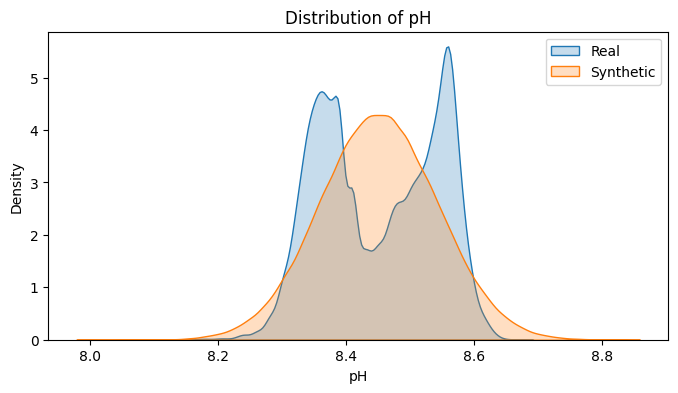

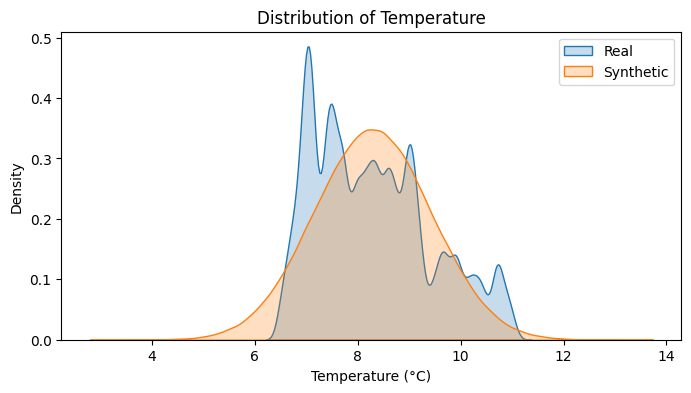

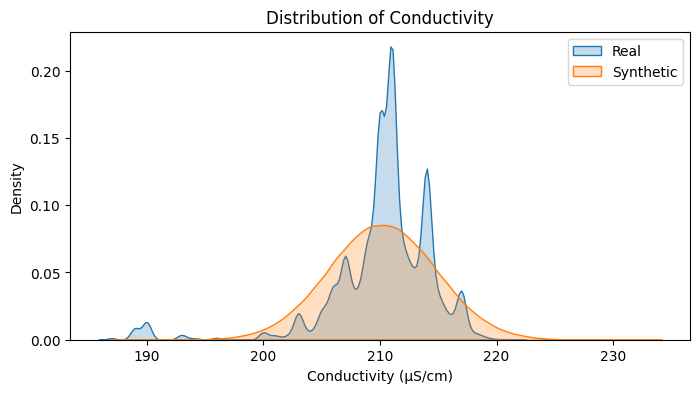

In [132]:
# Compare a few key features
plot_distribution('pH', 'pH', 'Distribution of pH')
plot_distribution('Temperature (°C)', 'Temperature (°C)', 'Distribution of Temperature')
plot_distribution('Conductivity (µS/cm)', 'Conductivity (µS/cm)', 'Distribution of Conductivity')

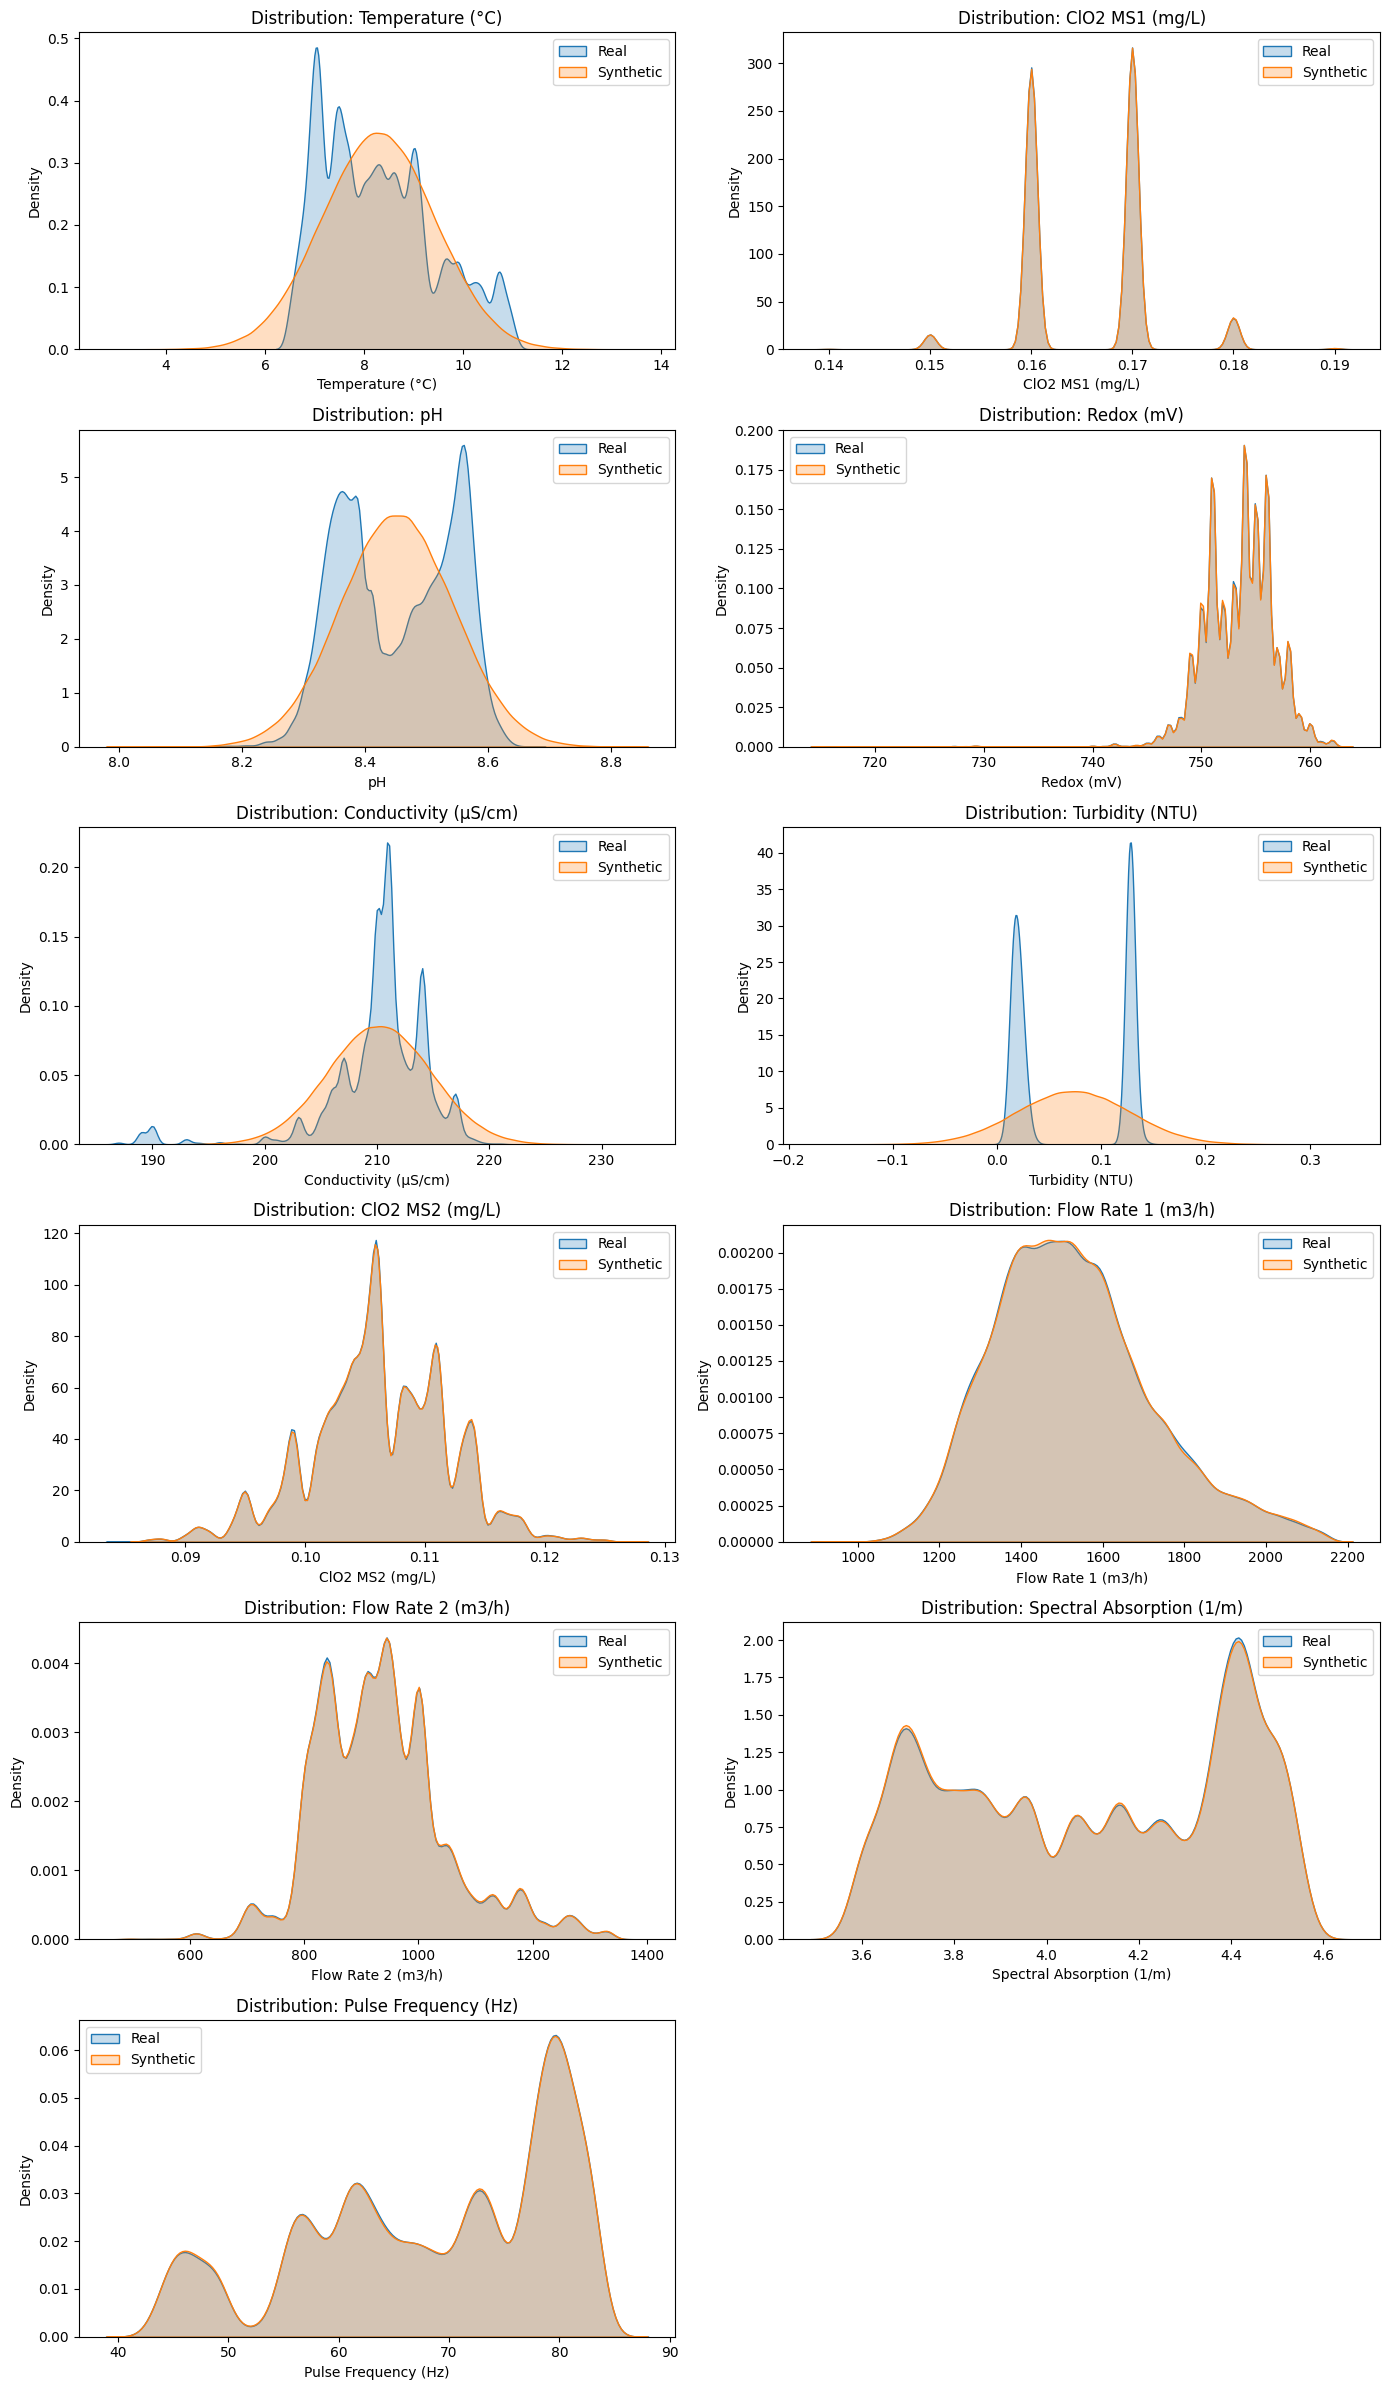

In [133]:
# === Automatically Compare All Numeric Columns ===

# Select numeric columns from the real and synthetic DataFrames
numeric_cols = df.select_dtypes(include=[np.number]).columns

def plot_all_distributions(real_df, synthetic_df, columns):
    import math
    import seaborn as sns
    import matplotlib.pyplot as plt

    n_cols = 2
    n_rows = math.ceil(len(columns) / n_cols)
    plt.figure(figsize=(14, 4 * n_rows))

    for idx, col in enumerate(columns):
        plt.subplot(n_rows, n_cols, idx + 1)
        try:
            sns.kdeplot(real_df[col].dropna(), label='Real', fill=True)
            sns.kdeplot(synthetic_df[col].dropna(), label='Synthetic', fill=True)
        except:
            # Fallback to hist if KDE fails
            plt.hist(real_df[col].dropna(), bins=30, alpha=0.5, label='Real')
            plt.hist(synthetic_df[col].dropna(), bins=30, alpha=0.5, label='Synthetic')
        
        plt.title(f'Distribution: {col}')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Run the comparison
plot_all_distributions(df, synthetic_df, numeric_cols)


In [134]:
synthetic_df.head()

,Timestamp,Temperature (°C),ClO2 MS1 (mg/L),pH,Redox (mV),Conductivity (µS/cm),Turbidity (NTU),ClO2 MS2 (mg/L),Flow Rate 1 (m3/h),Flow Rate 2 (m3/h),Event,Source,Spectral Absorption (1/m),Pulse Frequency (Hz)
0,2016-08-03 11:49:00,9.174233,0.17,8.541715,754.0,203.125772,0.035743,NaN,NaN,NaN,False,GECCO 2018,NaN,55.8769
1,2016-08-03 11:50:00,6.411758,0.17,8.501478,754.0,213.408333,0.111548,NaN,1626.0,NaN,False,GECCO 2019,4.08412,62.7229
2,2016-08-03 11:51:00,8.515010,0.16,8.393275,756.0,209.252414,0.126643,NaN,1741.0,789.0,False,GECCO 2018,NaN,NaN
3,2016-08-03 11:52:00,7.004344,0.17,8.492552,753.0,203.724306,0.105708,NaN,NaN,915.0,False,GECCO 2018,3.77406,62.0238
4,2016-08-03 11:53:00,8.133419,0.17,8.486602,NaN,200.827815,0.154290,NaN,NaN,937.0,False,GECCO 2018,4.38945,NaN


In [135]:
synthetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264460 entries, 0 to 264459
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Timestamp                  264460 non-null  datetime64[ns]
 1   Temperature (°C)           264460 non-null  float64       
 2   ClO2 MS1 (mg/L)            133583 non-null  float64       
 3   pH                         264460 non-null  float64       
 4   Redox (mV)                 133430 non-null  float64       
 5   Conductivity (µS/cm)       264460 non-null  float64       
 6   Turbidity (NTU)            264460 non-null  float64       
 7   ClO2 MS2 (mg/L)            133327 non-null  float64       
 8   Flow Rate 1 (m3/h)         133587 non-null  float64       
 9   Flow Rate 2 (m3/h)         132972 non-null  float64       
 10  Event                      264460 non-null  bool          
 11  Source                     264460 non-null  object  

In [136]:
synthetic_df.isnull().sum()

Timestamp                         0
Temperature (°C)                  0
ClO2 MS1 (mg/L)              130877
pH                                0
Redox (mV)                   131030
Conductivity (µS/cm)              0
Turbidity (NTU)                   0
ClO2 MS2 (mg/L)              131133
Flow Rate 1 (m3/h)           130873
Flow Rate 2 (m3/h)           131488
Event                             0
Source                            0
Spectral Absorption (1/m)    133261
Pulse Frequency (Hz)         133605
dtype: int64

In [137]:
synthetic_df.describe()

,Timestamp,Temperature (°C),ClO2 MS1 (mg/L),pH,Redox (mV),Conductivity (µS/cm),Turbidity (NTU),ClO2 MS2 (mg/L),Flow Rate 1 (m3/h),Flow Rate 2 (m3/h),Spectral Absorption (1/m),Pulse Frequency (Hz)
count,264460,264460.000000,133583.000000,264460.000000,133430.000000,264460.000000,264460.000000,133327.000000,133587.000000,132972.000000,131199.000000,130855.000000
mean,2016-11-03 07:38:29.999999744,8.287801,0.165609,8.450978,753.443142,210.189767,0.073164,0.106164,1527.498477,935.954697,4.096289,68.552628
min,2016-08-03 11:49:00,3.070523,0.140000,8.000818,715.000000,187.970294,-0.165614,0.087000,939.000000,486.000000,3.573230,42.163100
25%,2016-09-18 09:43:45,7.516349,0.160000,8.388741,751.000000,207.066876,0.036301,0.103000,1388.000000,850.000000,3.810610,60.399200
50%,2016-11-03 07:38:30,8.287193,0.170000,8.450858,754.000000,210.185640,0.073146,0.106000,1509.000000,928.000000,4.113150,71.321300
75%,2016-12-19 05:33:15,9.057194,0.170000,8.513200,756.000000,213.319254,0.109911,0.110000,1642.000000,1000.000000,4.395440,79.003700
max,2017-02-03 03:28:00,13.458162,0.190000,8.837089,763.000000,233.023753,0.328012,0.127017,2158.000000,1368.000000,4.579120,84.758900
std,NaN,1.141627,0.006392,0.092488,3.244052,4.632039,0.054547,0.005694,194.368654,115.364939,0.301928,11.433811


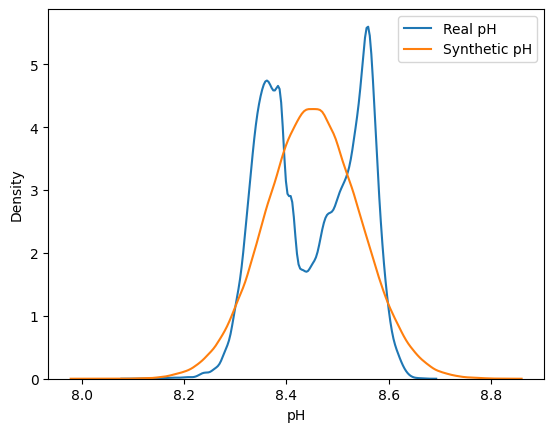

In [138]:
# Plot comparison
sns.kdeplot(df['pH'].dropna(), label='Real pH')
sns.kdeplot(synthetic_df['pH'].dropna(), label='Synthetic pH')
plt.legend()
plt.show()

In [139]:
synthetic_df.to_csv('synthetic_dataset.csv', index=False)